In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('/kaggle/input/tabular-playground-series-dec-2021/train.csv', index_col=0)
df_test = pd.read_csv('/kaggle/input/tabular-playground-series-dec-2021/test.csv', index_col=0)

# Data analysis

In [ ]:
df.head()

In [ ]:
df.info()

Check that everyone column have at least **2 unique values**

In [ ]:
df.drop(['Soil_Type15', 'Soil_Type7'], axis=1, inplace=True)
df_test.drop(['Soil_Type15', 'Soil_Type7'], axis=1, inplace=True)

Check target value

In [ ]:
df['Cover_Type'].value_counts()
df.drop(df[df['Cover_Type'] == 5].index, axis=0, inplace=True)

## Change type of columns. It **reduce memory** of dataset
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/pandas.png)

In [ ]:
import gc
def reduce_mem_usage(df, int_cast=True, obj_to_category=False, subset=None):

    start_mem = df.memory_usage().sum() / 1024 ** 2;
    gc.collect()
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    cols = subset if subset is not None else df.columns.tolist()

    for col in cols:
        col_type = df[col].dtype

        if col_type != object and col_type.name != 'category' and 'datetime' not in col_type.name:
            c_min = df[col].min()
            c_max = df[col].max()

            # test if column can be converted to an integer
            treat_as_int = str(col_type)[:3] == 'int'

            if treat_as_int:
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif 'datetime' not in col_type.name and obj_to_category:
            df[col] = df[col].astype('category')
    gc.collect()
    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.3f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
df = reduce_mem_usage(df)

In [ ]:
df.info()

### Numerical distribution

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(14,20))
sns.kdeplot(data=df, x='Elevation', hue='Cover_Type', ax=axes[0,0])
sns.kdeplot(data=df, x='Aspect', hue='Cover_Type', ax=axes[0,1])
sns.kdeplot(data=df, x='Slope', hue='Cover_Type', ax=axes[1,0])
sns.kdeplot(data=df, x='Horizontal_Distance_To_Hydrology', hue='Cover_Type', ax=axes[1,1])
sns.kdeplot(data=df, x='Vertical_Distance_To_Hydrology', hue='Cover_Type', ax=axes[2,0])
sns.kdeplot(data=df, x='Horizontal_Distance_To_Roadways', hue='Cover_Type', ax=axes[2,1])
sns.kdeplot(data=df, x='Hillshade_9am', hue='Cover_Type', ax=axes[3,0])
sns.kdeplot(data=df, x='Hillshade_Noon', hue='Cover_Type', ax=axes[3,1])
sns.kdeplot(data=df, x='Hillshade_3pm', hue='Cover_Type', ax=axes[4,0])
sns.kdeplot(data=df, x='Horizontal_Distance_To_Fire_Points', hue='Cover_Type', ax=axes[4,1])
plt.tight_layout()

# Feature engineering

We can reverse **onehot encoding** with **np.argmax** function
![](https://miro.medium.com/max/1838/1*O_pTwOZZLYZabRjw3Ga21A.png)

In [ ]:
Wilderness_cols = [col for col in df.columns if 'Wilderness' in col]
Wilderness=df[Wilderness_cols]
argmax_cols = Wilderness.columns[np.argmax(Wilderness.values, axis=1)]
df['Wilderness'] = argmax_cols
df['Wilderness'] = df['Wilderness'].astype('category')
df.drop(Wilderness_cols, axis=1, inplace=True)

Wilderness=df_test[Wilderness_cols]
argmax_cols = Wilderness.columns[np.argmax(Wilderness.values, axis=1)]
df_test['Wilderness'] = argmax_cols
df_test['Wilderness'] = df_test['Wilderness'].astype('category')
df_test.drop(Wilderness_cols, axis=1, inplace=True)

In [ ]:
Soil_cols = [col for col in df.columns if 'Soil_Type' in col]
Soil=df[Soil_cols]
argmax_cols = Soil.columns[np.argmax(Soil.values, axis=1)]
df['Soil_Type'] = argmax_cols
df['Soil_Type'] = df['Soil_Type'].str.replace('Soil_Type', '')
df['Soil_Type'] = df['Soil_Type'].astype('category')
df.drop(Soil_cols, axis=1, inplace=True)


Soil=df_test[Soil_cols]
argmax_cols = Soil.columns[np.argmax(Soil.values, axis=1)]
df_test['Soil_Type'] = argmax_cols
df_test['Soil_Type'] = df_test['Soil_Type'].str.replace('Soil_Type', '')
df_test['Soil_Type'] = df_test['Soil_Type'].astype('category')
df_test.drop(Soil_cols, axis=1, inplace=True)

In [ ]:
x, y = df.drop('Cover_Type', axis=1), df['Cover_Type']
del df

In [ ]:
def_cols = x.columns

# Featuretools
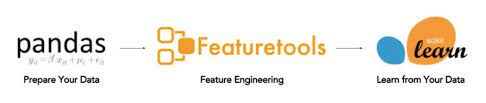

Creating **new features** with featuretools, it'll make model more flexiable

In [ ]:
x = x.reset_index()

Dividing dataset into **2 parts**, because Kaggle RAM have **limit of usage**

In [ ]:
import featuretools as ft

es = ft.EntitySet(id = 'trees')
es.add_dataframe(dataframe=x.iloc[:int(len(x)/2), :], dataframe_name='trees', make_index=False, index='Id')
first_x, feature_defs = ft.dfs(entityset = es, target_dataframe_name = 'trees', trans_primitives = ['add_numeric', 'multiply_numeric'], max_depth=1, chunk_size=20000, n_jobs=-1, verbose=True)

first_x = reduce_mem_usage(first_x)


In [ ]:
es = ft.EntitySet(id = 'trees')
es.add_dataframe(dataframe=x.iloc[int(len(x)/2):, :], dataframe_name='trees', make_index=False, index='Id')
second_x, feature_defs = ft.dfs(entityset = es, target_dataframe_name = 'trees', trans_primitives = ['add_numeric', 'multiply_numeric'], max_depth=1, chunk_size=20000, n_jobs=-1, verbose=True)

second_x = reduce_mem_usage(second_x)

In [ ]:
del x
gc.collect()

In [ ]:
x = pd.concat([first_x, second_x], axis=0)

In [ ]:
cor_matrix = x.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
x = x.drop(set(to_drop) - set(def_cols), axis=1)

In [ ]:
x.info()

In [ ]:
x.head()

In [ ]:
es = ft.EntitySet(id = 'trees')
es.add_dataframe(dataframe=df_test, dataframe_name='trees', make_index=False, index='Id')
test, feature_defs = ft.dfs(entityset = es, target_dataframe_name = 'trees', trans_primitives = ['add_numeric', 'multiply_numeric'], max_depth=1, chunk_size=20000, n_jobs=-1, verbose=True)

test = reduce_mem_usage(test)

# Modeling Catboost
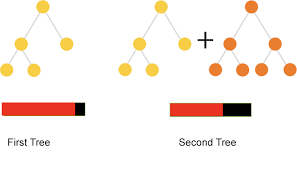

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
cat_cols_boost = x_train.select_dtypes(include='category').columns.values

del x, y

In [ ]:
from catboost import CatBoostClassifier, Pool
cat = CatBoostClassifier(task_type='GPU', early_stopping_rounds=75, iterations=1000)
eval_dataset = Pool(x_test, y_test, cat_cols_boost)

In [ ]:
cat.fit(x_train, y_train, cat_cols_boost, eval_set=eval_dataset)

In [ ]:
print(cat.score(x_test, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
preds = cat.predict(x_test)
print(classification_report(y_test, preds))

In [ ]:
print(confusion_matrix(y_test, preds))

In [ ]:
test_preds = cat.predict(test)
submit = pd.read_csv('/kaggle/input/tabular-playground-series-dec-2021/sample_submission.csv', index_col=0)
submit['Cover_Type'] = test_preds
submit.to_csv('submit.csv')